In [2]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd

### Load in scores and outputs from BoN (up to 32)

In [29]:
# Load and process the .jsonl file
def load_jsonl_extract_accuracy(jsonl_path):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted_1 = entry["indicator_weighted@1"]
            indicator_naive_1 = entry["indicator_naive@1"]
            indicator_maj_1 = entry["indicator_maj@1"]
            indicator_weighted_2 = entry["indicator_weighted@2"]
            indicator_naive_2 = entry["indicator_naive@2"]
            indicator_maj_2 = entry["indicator_maj@2"]
            indicator_weighted_4 = entry["indicator_weighted@4"]
            indicator_naive_4 = entry["indicator_naive@4"]
            indicator_maj_4 = entry["indicator_maj@4"]
            indicator_weighted_8 = entry["indicator_weighted@8"]
            indicator_naive_8 = entry["indicator_naive@8"]
            indicator_maj_8 = entry["indicator_maj@8"]
            indicator_weighted_16 = entry["indicator_weighted@16"]
            indicator_naive_16 = entry["indicator_naive@16"]
            indicator_maj_16 = entry["indicator_maj@16"]
            indicator_weighted_32 = entry["indicator_weighted@32"]
            indicator_naive_32 = entry["indicator_naive@32"]
            indicator_maj_32 = entry["indicator_maj@32"]
            correctness_1 = entry["correctness@1"]
            correctness_2 = entry["correctness@2"]
            correctness_4 = entry["correctness@4"]
            correctness_8 = entry["correctness@8"]
            correctness_16 = entry["correctness@16"]
            correctness_32 = entry["correctness@32"]
            data.append({
                "question": question,
                "score": score_list,
                "score_list": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted_1": indicator_weighted_1,
                "indicator_naive_1": indicator_naive_1,
                "indicator_maj_1": indicator_maj_1,
                "indicator_weighted_2": indicator_weighted_2,
                "indicator_naive_2": indicator_naive_2,
                "indicator_maj_2": indicator_maj_2,
                "indicator_weighted_4": indicator_weighted_4,
                "indicator_naive_4": indicator_naive_4,
                "indicator_maj_4": indicator_maj_4,
                "indicator_weighted_8": indicator_weighted_8,
                "indicator_naive_8": indicator_naive_8,
                "indicator_maj_8": indicator_maj_8,
                "indicator_weighted_16": indicator_weighted_16,
                "indicator_naive_16": indicator_naive_16,
                "indicator_maj_16": indicator_maj_16,
                "indicator_weighted_32": indicator_weighted_32,
                "indicator_naive_32": indicator_naive_32,
                "indicator_maj_32": indicator_maj_32,
                "correctness_1": correctness_1,
                "correctness_2": correctness_2,
                "correctness_4": correctness_4,
                "correctness_8": correctness_8,
                "correctness_16": correctness_16, 
                 "correctness_32": correctness_32, # list of whether each of 8 generations is correct or not.
            })

    return pd.DataFrame(data)

In [30]:
df_N8 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/best_of_n_completions.jsonl")

In [31]:
df_N8.head()

,question,score,score_list,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,...,indicator_maj_16,indicator_weighted_32,indicator_naive_32,indicator_maj_32,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,correctness_32
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",1,1,1,1,1,1,...,0,1,1,1,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,..."
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru..."
3,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru..."
4,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True..."


In [32]:
# add column for question index.
df_N8["sb_idx"] = df_N8.index.tolist()

In [33]:
df_N8.columns

Index(['question', 'score', 'score_list', 'completion_tokens',
       'indicator_weighted_1', 'indicator_naive_1', 'indicator_maj_1',
       'indicator_weighted_2', 'indicator_naive_2', 'indicator_maj_2',
       'indicator_weighted_4', 'indicator_naive_4', 'indicator_maj_4',
       'indicator_weighted_8', 'indicator_naive_8', 'indicator_maj_8',
       'indicator_weighted_16', 'indicator_naive_16', 'indicator_maj_16',
       'indicator_weighted_32', 'indicator_naive_32', 'indicator_maj_32',
       'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8',
       'correctness_16', 'correctness_32', 'sb_idx'],
      dtype='object')

In [37]:
# create pivot table.

# Columns to melt (indicators)
sl_cols = [
    "indicator_weighted_1", "indicator_naive_1", "indicator_maj_1",
    "indicator_weighted_2", "indicator_naive_2", "indicator_maj_2",
    "indicator_weighted_4", "indicator_naive_4", "indicator_maj_4",
    "indicator_weighted_8", "indicator_naive_8", "indicator_maj_8",
    "indicator_weighted_16", "indicator_naive_16", "indicator_maj_16",
    "indicator_weighted_32", "indicator_naive_32", "indicator_maj_32",
]

# Melt the dataframe from wide to long
predictor_df = df_N8.melt(
    id_vars=['question', 'score', 'score_list', 'completion_tokens', 'sb_idx', 
             'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8', 'correctness_16'], # , 'correctness_32'
    value_vars=sl_cols,
    var_name='method_N',
    value_name='indicator'
) # indicator: whether the final answer is correct.

# # Extract method and N from 'method_N'
predictor_df[['drop', 'method', 'N']] = predictor_df['method_N'].str.extract(r'(indicator)_(\w+?)_(\d+)')
predictor_df.drop(columns=['method_N', 'drop'], inplace=True)

# Convert N to integer
predictor_df['N'] = predictor_df['N'].astype(int)

# Show result
predictor_df.head()

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,method,N
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",1,weighted,1
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,weighted,1
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",2,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,weighted,1
3,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,weighted,1
4,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",1,weighted,1


In [38]:
predictor_df.columns

Index(['question', 'score', 'score_list', 'completion_tokens', 'sb_idx',
       'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8',
       'correctness_16', 'indicator', 'method', 'N'],
      dtype='object')

In [39]:
# sanity check that melting worked correctly.
# predictor_df[predictor_df["sb_idx"] == 1]
# type(predictor_df["completion_tokens"][0]) 

### change completion_tokens to a list of ints.
predictor_df["completion_tokens"] = predictor_df["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [40]:
# Compute length of question (aka, length of the string)
predictor_df["question_length"] = predictor_df["question"].str.len()
predictor_df["token_count"] = predictor_df["completion_tokens"].apply(sum)
predictor_df = pd.get_dummies(predictor_df, columns=["method"])

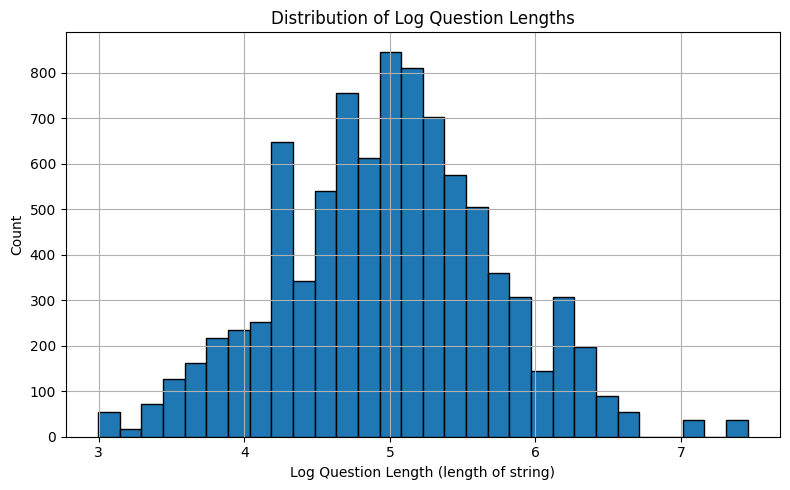

In [41]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(np.log(predictor_df["question_length"]), bins=30, edgecolor='black')

plt.xlabel("Log Question Length (length of string)")
plt.ylabel("Count")
plt.title("Distribution of Log Question Lengths")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Plots of Accuracy

In [42]:
N_val = [1, 2, 4, 8, 16, 32]
mv_accuracy = np.mean(df_N8["indicator_maj_1"]), np.mean(df_N8["indicator_maj_2"]), np.mean(df_N8["indicator_maj_4"]), np.mean(df_N8["indicator_maj_8"]), np.mean(df_N8["indicator_maj_16"]), np.mean(df_N8["indicator_maj_32"])
BoN_vanilla_accuracy = np.mean(df_N8["indicator_naive_1"]), np.mean(df_N8["indicator_naive_2"]), np.mean(df_N8["indicator_naive_4"]), np.mean(df_N8["indicator_naive_8"]), np.mean(df_N8["indicator_naive_16"]), np.mean(df_N8["indicator_naive_32"])
BoN_weighted_accuracy = np.mean(df_N8["indicator_weighted_1"]), np.mean(df_N8["indicator_weighted_2"]), np.mean(df_N8["indicator_weighted_4"]), np.mean(df_N8["indicator_weighted_8"]), np.mean(df_N8["indicator_weighted_16"]), np.mean(df_N8["indicator_weighted_32"])
df_accuracy = pd.DataFrame({
    "N": N_val,
    "majority_vote": mv_accuracy,
    "BoN_vanilla": BoN_vanilla_accuracy,
    "BoN_weighted": BoN_weighted_accuracy
})

In [43]:
df_accuracy.head()

,N,majority_vote,BoN_vanilla,BoN_weighted
0,1,0.388,0.388,0.388
1,2,0.388,0.474,0.474
2,4,0.470,0.520,0.526
3,8,0.552,0.558,0.582
4,16,0.594,0.586,0.636


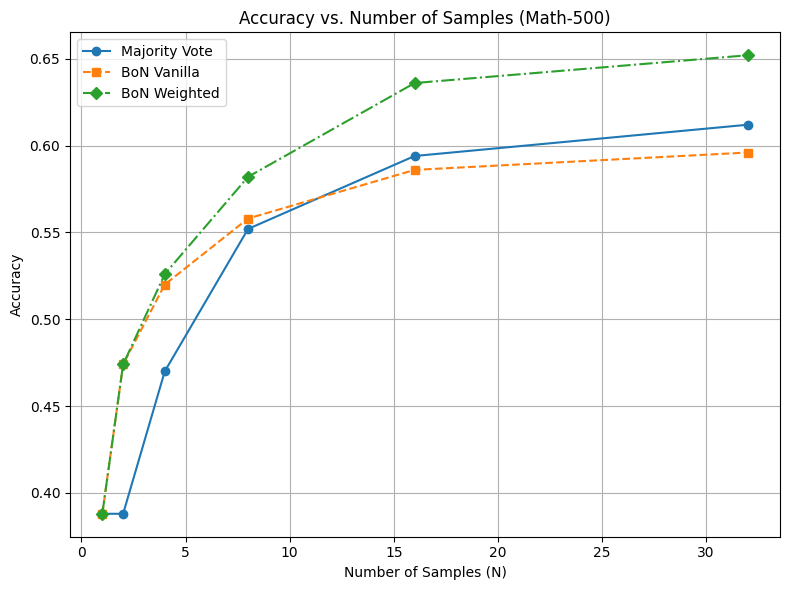

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot of accuracy vs. number of samples
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (Math-500)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("accuracy_vs_N_Math500_Bo32.png", dpi=300)
plt.show()

In [3]:
# save to csv.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_predictor_df.csv"
# predictor_df.to_csv(output_file, index=False)

# read df.
predictor_df = pd.read_csv(output_file)

### Prepare Features for Difficulty Probe.

In [5]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from transformers import BertTokenizer, BertModel

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA available: False
CUDA device name: No GPU


To test out: different embedding models.

In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
# Load the model and tokenizer
model_name = "Qwen/Qwen2.5-1.5B-Instruct" # to try: quantized mode.
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)

In [133]:
local_model_path = "/u/jhjenny9/.cache/huggingface/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594"
tokenizer = BertTokenizer.from_pretrained(local_model_path)
model = BertModel.from_pretrained(local_model_path).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [134]:
# Set device to match model
device = model.device
device

device(type='cpu')

In [135]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token is at position 0
    return cls_embedding.squeeze().numpy()

In [136]:
# create train/test split based on 'sb_idx' (query identifier)
from sklearn.model_selection import train_test_split

unique_sb_idx = predictor_df['sb_idx'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_sb_idx,
    test_size=0.20, # .15
    random_state=6
)

# Divide queries (represented by sb_idx) into train and test
df_train = predictor_df[predictor_df['sb_idx'].isin(sb_idx_train)].reset_index(drop=True)
df_test = predictor_df[predictor_df['sb_idx'].isin(sb_idx_test)].reset_index(drop=True)

In [137]:
# (Training Data) Extract features: CLS + decoding parameters
cls_features = []

## Scaling factors
NUM_SAMPLES_SCALE = 1.0 
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_train.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([
        cls_vec, 
        [num_samples, question_length, method_maj, method_naive, method_weighted]
    ]) 

    cls_features.append(features)

In [ ]:
X_train = np.array(cls_features)
y_train = df_train["indicator"].values.astype(int)
# y_train = df_train["sl"].values

## save X_train and y_train hard labels as .npz file.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_Xy_train.npz"
# np.savez(output_file, X_train=X_train, y_train=y_train)

In [3]:
# load X_train and y_train hard labels from .npz file.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_Xy_train.npz"
data = np.load(output_file)
X_train = data['X_train']
y_train = data['y_train']

In [4]:
X_train.shape

(7200, 773)

### Plotting Feature Importance.

In [6]:
# split high-dimensional CLS and interpretable features
cls_dim = 768 # len(cls_vec)
cls_part = X_train[:, :cls_dim]
named_features = pd.DataFrame(
    X_train[:, cls_dim:],  # shape (n_samples, 5)
    columns=["num_samples", "question_length", "method_maj", "method_naive", "method_weighted"]
)

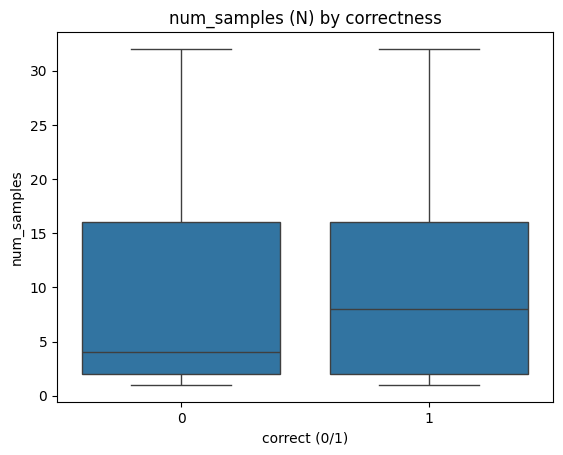

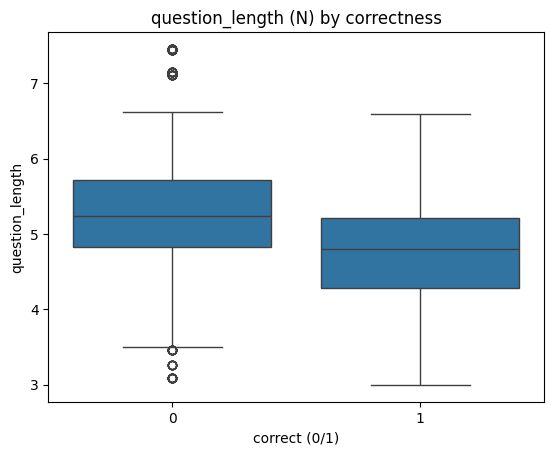

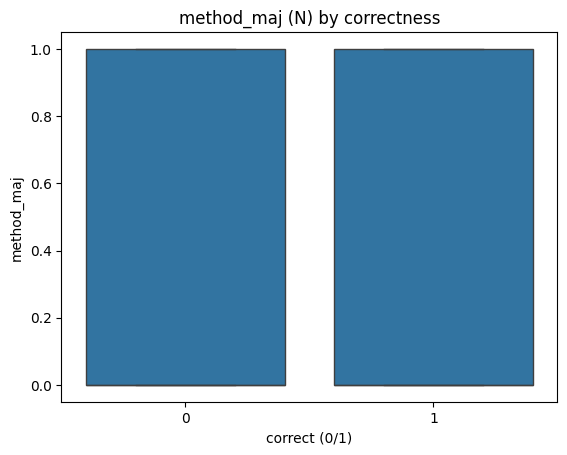

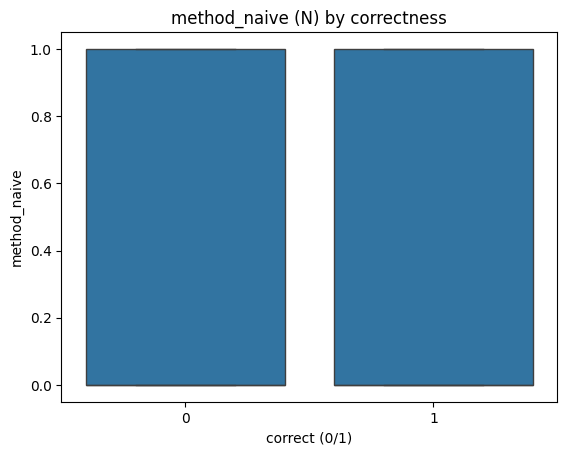

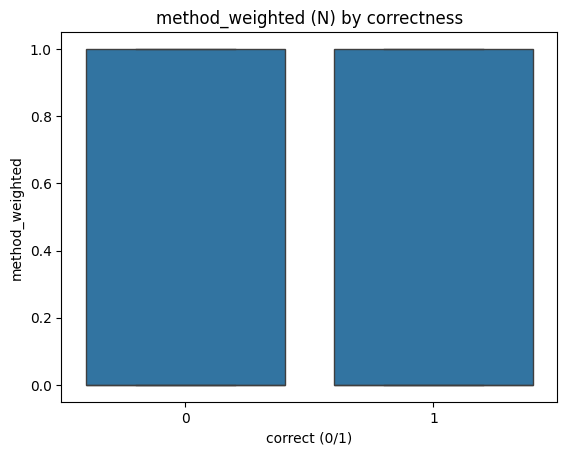

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in named_features.columns:
    sns.boxplot(x=y_train, y=named_features[col])
    plt.title(f"{col} (N) by correctness")
    plt.xlabel("correct (0/1)")
    plt.ylabel(col)
    plt.show()

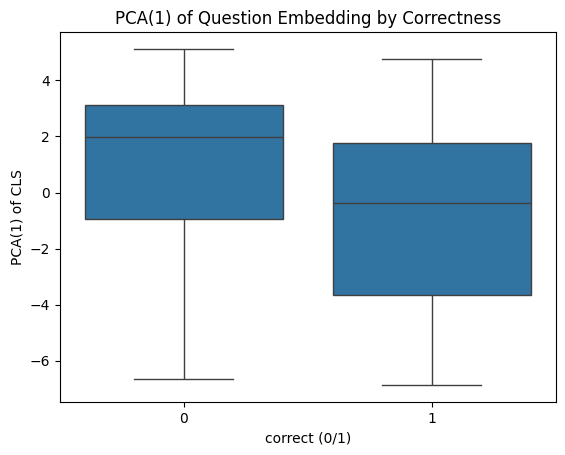

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 1D or 2D
pca = PCA(n_components=1)
cls_1d = pca.fit_transform(cls_part)[:, 0]

# Plot 1D PCA of CLS
sns.boxplot(x=y_train, y=cls_1d)
plt.title("PCA(1) of Question Embedding by Correctness")
plt.xlabel("correct (0/1)")
plt.ylabel("PCA(1) of CLS")
plt.show()

### Create Testing Data

In [56]:
# (Testing Data) Extract features: CLS + decoding parameters
cls_features = []

NUM_SAMPLES_SCALE = 1.0
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_test.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([cls_vec, [num_samples, question_length, method_maj, method_naive, method_weighted]]) 
    cls_features.append(features)

In [58]:
X_test = np.array(cls_features)
y_test = df_test["indicator"].values.astype(int)
# y_test = df_test["sl"].values

In [10]:
# save X_test and y_test hard labels as .npz file.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_Xy_test.npz"
# np.savez(output_file, X_test=X_test, y_test=y_test)

# load X_test and y_test hard labels from .npz file.
data = np.load(output_file)
X_test = data['X_test']
y_test = data['y_test']

### Train MLP.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7200, 773), (7200,), (1800, 773), (1800,))

### MLP Classifier from sklearn

In [16]:
# 2-layer MLP Binary Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
# print train/test losses.

mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

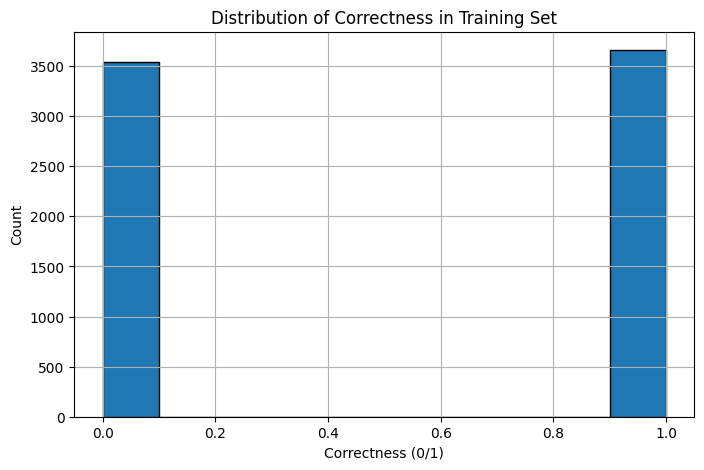

In [19]:
# create histogram of y_train
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=10, edgecolor='black')
plt.xlabel("Correctness (0/1)")
plt.ylabel("Count")
plt.title("Distribution of Correctness in Training Set")
plt.grid(True)

In [17]:
from sklearn.metrics import log_loss

# Compute train loss
y_train_proba = mlp_clf.predict_proba(X_train)  # Predicted probabilities for train set
train_loss = log_loss(y_train, y_train_proba)

# Compute test loss
y_test_proba = mlp_clf.predict_proba(X_test)  # Predicted probabilities for test set
test_loss = log_loss(y_test, y_test_proba)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Train Loss: 0.0284
Test Loss: 2.2764


In [183]:
from sklearn.calibration import CalibrationDisplay

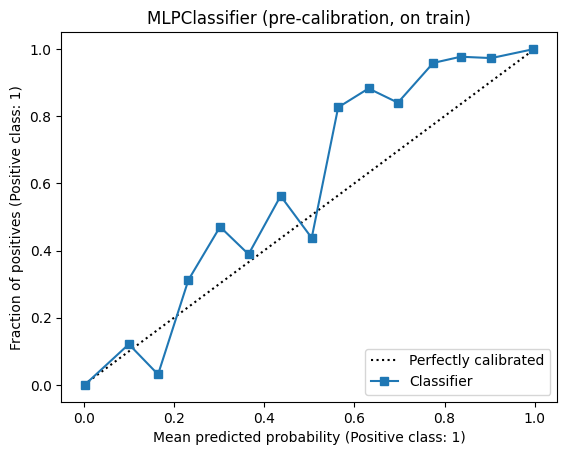

In [185]:
# Predict probabilities instead of labels
y_proba = mlp_clf.predict_proba(X_train)[:, 1]  # use probabilities for the positive class
# y_proba = hardLabel_preds_numpy  # use the soft label predictions directly
# Create calibration plot
disp = CalibrationDisplay.from_predictions(y_train, y_proba, n_bins=15)

plt.title("MLPClassifier (pre-calibration, on train)")
# Show plot
plt.show()

Each point represents a group of test samples (i.e., the dot at "Fraction of positive" of 0.4 represents a group of test samples where 0.4 of the samples belong to the negative class)

In [39]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

Split train data into train and validate.

In [40]:
X_train_remain, X_calib, y_train_remain, y_calib = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [41]:
base_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
base_mlp.fit(X_train_remain, y_train_remain)

,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


Calibrate using validation set

In [48]:
calibrated_mlp = CalibratedClassifierCV(estimator=base_mlp, method='isotonic', ensemble=False, cv='prefit')
calibrated_mlp.fit(X_calib, y_calib)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


,estimator,MLPClassifier...ndom_state=42)
,method,'isotonic'
,cv,'prefit'
,n_jobs,None
,ensemble,False
,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'


Use calibrated MLP to make predictions

In [51]:
y_proba_base = base_mlp.predict_proba(X_test)[:, 1]
y_proba_calibrated = calibrated_mlp.predict_proba(X_test)[:, 1]

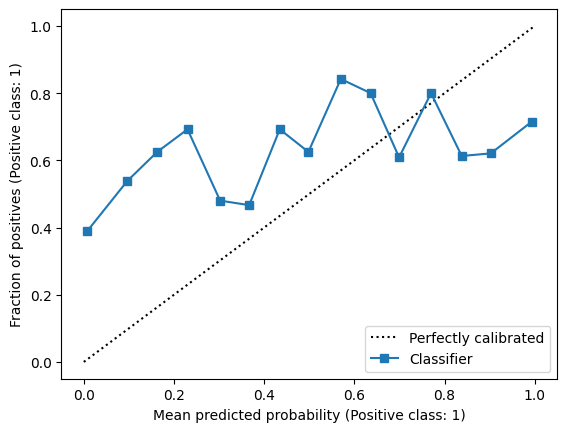

In [58]:
CalibrationDisplay.from_predictions(y_test, y_proba_base, n_bins=15)
plt.show()

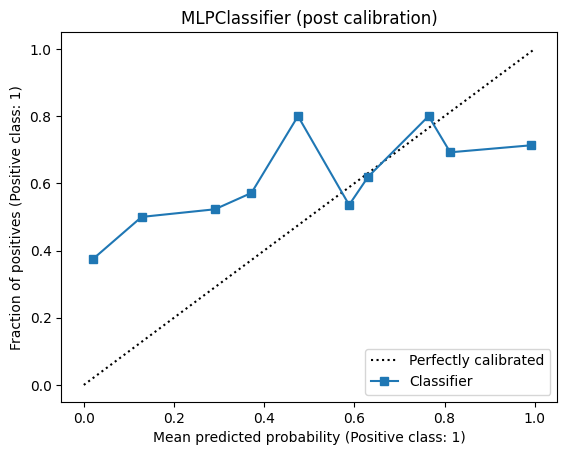

In [66]:
CalibrationDisplay.from_predictions(y_test, y_proba_calibrated, n_bins=10)
plt.title("MLPClassifier (post calibration)")
plt.show()

In [242]:
# for ablation purposes (i want to test out whether the problem is with the poorly-calibrated difficulty probe; thus, i will test the probe on the training set.)
y_pred_train = mlp_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.9911


In [188]:
print(f"Binary Classification Accuracy: {acc:.4f}")
print(classification_report(y_train, y_pred_train))

Binary Classification Accuracy: 0.9911
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3540
           1       0.99      0.99      0.99      3660

    accuracy                           0.99      7200
   macro avg       0.99      0.99      0.99      7200
weighted avg       0.99      0.99      0.99      7200



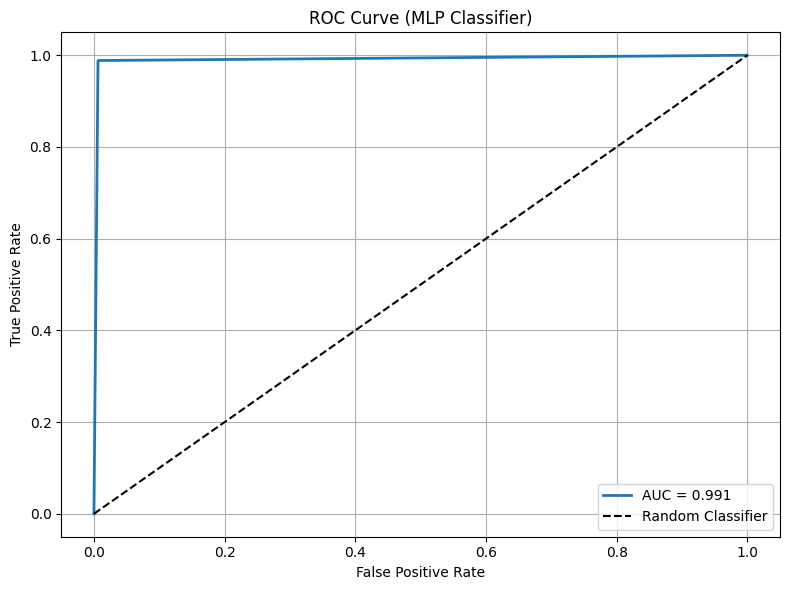

In [189]:
# AUC with all features.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = mlp_clf.predict_proba(X_train)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# Compute AUC
auc = roc_auc_score(y_train, y_pred_train)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLP Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
# plt.show()

# plt.savefig("figs/roc_all_mlp.png")

### Train XGBoost Classifier

In [121]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [122]:
# features without N.
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6344


In [123]:
# compute AUC
# Get predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.6902


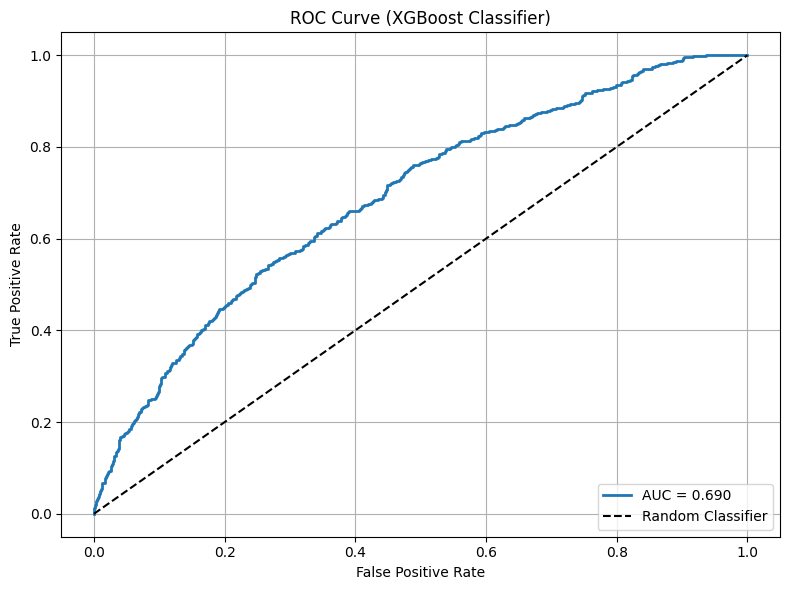

In [124]:
# AUC with all features.

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

In [125]:
import shap

explainer = shap.Explainer(model, X_train)     # TreeExplainer under the hood
shap_values = explainer(X_test)               # SHAP values for each sample

In [129]:
# Example: get SHAP values for variables.

    # cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # # Scalar features
    # num_samples = row["N"] * NUM_SAMPLES_SCALE
    # question_length = row["question_length"] * QUESTION_LENGTH_SCALE
    # method_maj = row["method_maj"] * METHOD_SCALE
    # method_naive = row["method_naive"] * METHOD_SCALE
    # method_weighted = row["method_weighted"] * METHOD_SCALE

question_embedding_shap = shap_values.values[:, :-5]
num_samples_shap = shap_values.values[:, -5]
question_length_shap = shap_values.values[:, -4]
method_maj_shap = shap_values.values[:, -3]
method_naive_shap = shap_values.values[:, -2]
method_weighted_shap = shap_values.values[:, -1]

# Summary statistics
print(f"Mean SHAP value for 'num samples': {num_samples_shap.mean():.4f}")
print(f"Mean SHAP value for 'question length': {question_length_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_maj': {method_maj_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_naive': {method_naive_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_weighted': {method_weighted_shap.mean():.4f}")
print(f"Mean SHAP value for 'question embedding': {question_embedding_shap.mean():.4f}")

Mean SHAP value for 'num samples': 0.3132
Mean SHAP value for 'question length': -0.0138
Mean SHAP value for 'method_maj': 0.0688
Mean SHAP value for 'method_naive': 0.0242
Mean SHAP value for 'method_weighted': 0.0263
Mean SHAP value for 'question embedding': 0.0011


In [ ]:
# predict probability of positive class (correct answer) for test set.
# y_proba = mlp_clf.predict_proba(X_test)[:, 1]

In [243]:
# for ablation purposes (i want to test out whether the problem is with the poorly-calibrated difficulty probe; thus, i will test the probe on the training set.)
y_proba_train = mlp_clf.predict_proba(X_train)[:, 1]

In [244]:
# df_train['predicted_prob'] = hardLabel_preds_numpy
df_train['predicted_prob'] = y_proba_train # sklearn MLPClassifier predictions (hard label version)
# df_test['predicted_prob'] = hardLabel_preds_numpy # PyTorch MLP predictions from hard label.

In [245]:
df_train.head(5)

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,N,question_length,token_count,predicted_prob,method
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",1,1,161,275,0.998820,weighted
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,217,931,0.000036,weighted
2,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,1,54,374,0.999751,weighted
3,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",1,1,731,450,0.980819,weighted
4,A regular hexagon can be divided into six equi...,"[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[285, 204, 258, 175, 168, 93, 313, 335, 236, 2...",5,[True],"[True, True]","[True, True, True, False]","[True, True, True, False, True, False, True, F...","[True, True, True, False, True, False, True, F...",1,1,177,285,0.997842,weighted


In [ ]:
df_test["accuracy"] = df_test["correctness"].apply(lambda x: sum(x) / len(x))
df_test.head()

In [246]:
# there should be 18 different BoN configurations for each query in the test set.
df_train.groupby('sb_idx').size().reset_index(name='count')

,sb_idx,count
0,0,18
1,1,18
2,3,18
3,4,18
4,5,18
...,...,...
395,493,18
396,494,18
397,496,18
398,497,18


In [ ]:
# Transform method columns into a single 'method' column.

def decode_method(row):
    if row["method_maj"]:
        return "majority"
    elif row["method_naive"]:
        return "naive"
    elif row["method_weighted"]:
        return "weighted"
    else:
        return "unknown"

# Apply the function row-wise
# df_test["method"] = df_test.apply(decode_method, axis=1)
df_train["method"] = df_train.apply(decode_method, axis=1)

# drop the one-hot columns
# df_test = df_test.drop(columns=["method_maj", "method_naive", "method_weighted"])
df_train = df_train.drop(columns=["method_maj", "method_naive", "method_weighted"])

In [247]:
df_train.head()

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,N,question_length,token_count,predicted_prob,method
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",1,1,161,275,0.998820,weighted
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,217,931,0.000036,weighted
2,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,1,54,374,0.999751,weighted
3,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",1,1,731,450,0.980819,weighted
4,A regular hexagon can be divided into six equi...,"[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[285, 204, 258, 175, 168, 93, 313, 335, 236, 2...",5,[True],"[True, True]","[True, True, True, False]","[True, True, True, False, True, False, True, F...","[True, True, True, False, True, False, True, F...",1,1,177,285,0.997842,weighted


In [ ]:
# df_test.head()

# # save test set with hard labels.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_test_set.csv"
# df_test.to_csv(output_file, index=False)
# print(f"Test set with hard labels saved to {output_file}")

# save train set with hard labels.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv"
# df_train.to_csv(output_file, index=False)
# print(f"Train set with hard labels saved to {output_file}")

Train set with hard labels saved to /dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv


In [ ]:
# # read prediction-with-hardLabel test set.
# df_test = pd.read_csv(output_file)
# df_test.head()

# read prediction-with-hardLabel (trained on PyTorch MLP) train set.
# df_train = pd.read_csv(output_file)
# df_train.shape

(7200, 16)

In [248]:
# turn completion_tokens into a list of ints.
df_test["completion_tokens"] = df_test["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_train["completion_tokens"] = df_train["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [249]:
df_test["token_count"] = df_test.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)
df_train["token_count"] = df_train.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)

START HERE IF YOU HAVE THE DATA FOR THE ROUTER (Best-of-32).

In [ ]:
# save df_test to csv
# df_test.to_csv("df_router_mv_bon.csv", index=False)
# df_test.to_csv("df_router_mv_bo32.csv", index=False)  # Bo32.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv"
# df_train.to_csv(output_file, index=False)

# load in csv.
# df_test = pd.read_csv("df_router_mv_bo32.csv") # Bo32.
df_train = pd.read_csv(output_file)  # Bo32 train set.

In [250]:
# get the average accuracy and token_count for each configuration of step-beam that was run.
config_summary_df = df_train.groupby(["N", "method"])[
    ["indicator", "token_count"] # accuracy keeps track of Pass@N (aka, percentage of correct answers).
].mean().reset_index()
# config_summary_df = df_train.groupby(["N", "method"])[
#     ["indicator", "token_count"]
# ].mean().reset_index() # mean indicator is percentage of questions (out of 100 questions) that are answered correctly.

In [ ]:
# config_summary_df = df_train.groupby(["N", "method"])[
#     ["sl", "token_count"]
# ].mean().reset_index()

In [251]:
config_summary_df.head(20)

,N,method,indicator,token_count
0,1,majority,0.3875,519.2925
1,1,naive,0.3875,519.2925
2,1,weighted,0.3875,519.2925
3,2,majority,0.3875,1049.5950
4,2,naive,0.4700,1049.5950
5,2,weighted,0.4700,1049.5950
6,4,majority,0.4625,2127.3000
7,4,naive,0.5050,2127.3000
8,4,weighted,0.5125,2127.3000
9,8,majority,0.5350,4169.8125


In [208]:
config_summary_df.head(20)

,N,method,indicator,token_count
0,1,majority,0.3875,519.2925
1,1,naive,0.3875,519.2925
2,1,weighted,0.3875,519.2925
3,2,majority,0.3875,1049.5950
4,2,naive,0.4700,1049.5950
5,2,weighted,0.4700,1049.5950
6,4,majority,0.4625,2127.3000
7,4,naive,0.5050,2127.3000
8,4,weighted,0.5125,2127.3000
9,8,majority,0.5350,4169.8125


### Plot of Accuracies per Configuration
Config Summary DF.

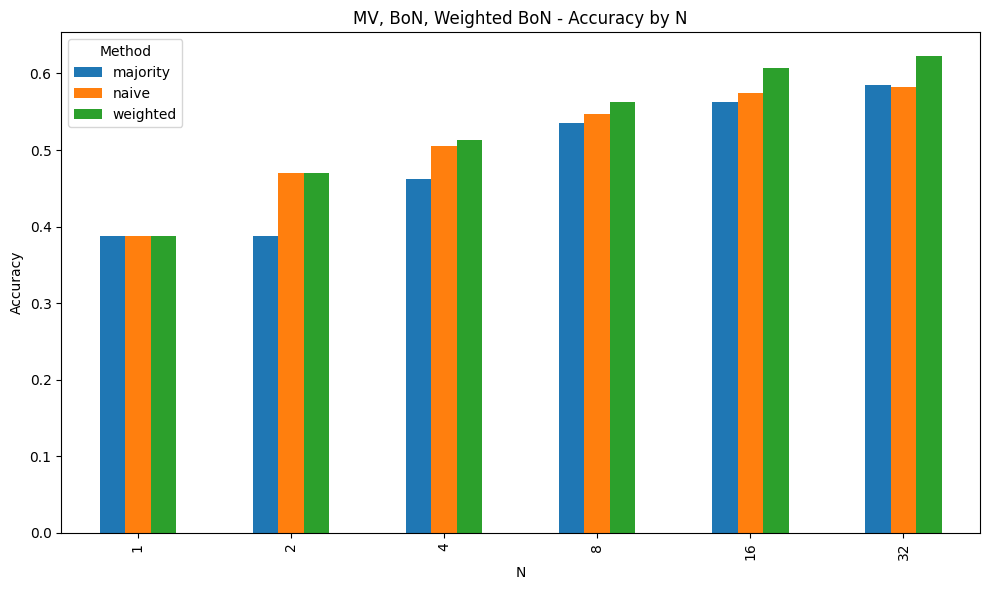

In [209]:
### TRAINING DF
# Pivot for plotting
pivot_df = config_summary_df.pivot(index="N", columns="method", values="indicator")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

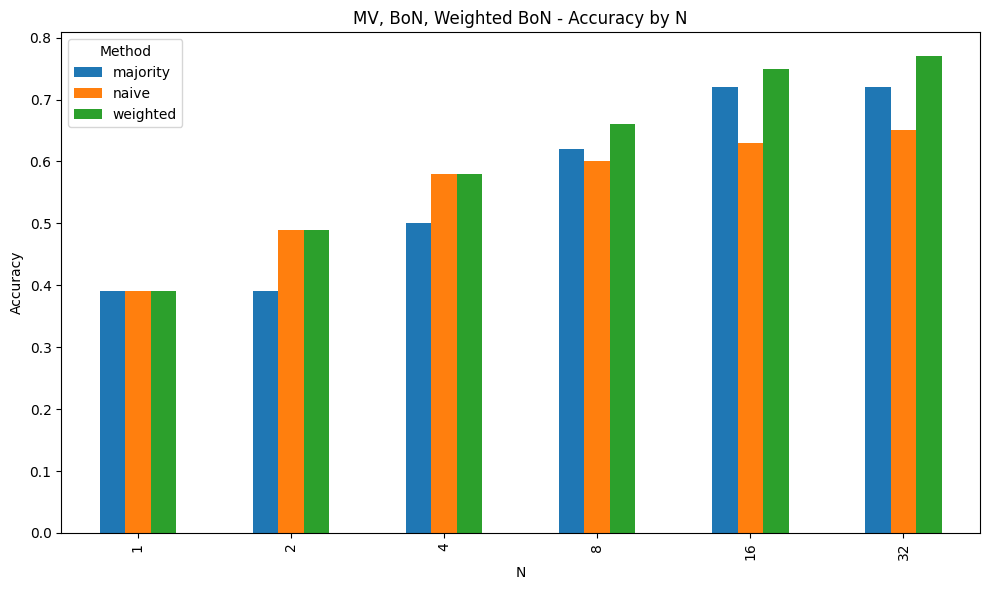

In [ ]:
# TESTING DF
pivot_df = config_summary_df.pivot(index="N", columns="method", values="indicator")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

### Optimal-Utility Router

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

$$\text{Query-adaptive}(x, m) = \argmax_m \; \text{Utility}(x, m)

Input: A dataframe that contains rows for different settings (beam size, beam width, chunk size, etc.) and includes: an accuracy column, an avg_cot_token_count column (which is the cost), and a sb_idx column (which is the query).

A parameter, lambda, that controls how much the user is willing to tradeoff accuracy and cost.

For each group (i.e., all rows of the same query, or sb_idx):

It computes a utility value for each row:

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

It finds the row with the highest utility in that group.

Output:
A new DataFrame where each row corresponds to a query and contains:
the best utility found, the accuracy, and cost for that best-performing configuration.

In [ ]:
def compute_max_utility_pred(df, lambda_):
    def get_max_utility(group): # verified correctness. (July 22nd)
        group = group.copy()
        group["utility"] = group["predicted_prob"] - lambda_ * group["token_count"]
        # print(group["predicted_prob"], group["indicator"], group["token_count"], group["N"], group["method"])
        idx_max = group["utility"].idxmax()
        # print("max utility index is: ", idx_max)
        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
            "indicator": group.loc[idx_max, "indicator"], # indicator that keeps track of whether the answer is correct.
            "max_cost": group.loc[idx_max, "token_count"],
            "N": group.loc[idx_max, "N"],
            "method": group.loc[idx_max, "method"],
        })

    result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
    return result_df

In [240]:
lambda_value = 0
# for large lambda values, the max-accuracy is 0/1 because N is small in BoN.
adaptive_router_0_lambda = compute_max_utility_pred(df_train, lambda_value)
adaptive_router_0_lambda.head(20) # 100 questions in the test set.

/tmp/ipykernel_1975045/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


,sb_idx,max_utility,max_predicted_prob,indicator,max_cost,N,method
0,0,9.435114e-01,9.435114e-01,1,8370,32,weighted
1,1,4.845386e-04,4.845386e-04,0,26638,32,naive
2,3,9.908822e-01,9.908822e-01,1,11168,32,weighted
3,4,8.498532e-01,8.498532e-01,1,13495,32,weighted
4,5,9.990435e-01,9.990435e-01,1,8097,32,weighted
5,6,9.273844e-01,9.273844e-01,1,14680,32,weighted
6,7,8.432384e-01,8.432384e-01,1,20381,32,weighted
7,8,9.930792e-01,9.930792e-01,0,9568,32,weighted
8,9,4.755130e-01,4.755130e-01,0,13581,16,naive
9,11,2.297134e-03,2.297134e-03,0,24231,32,naive


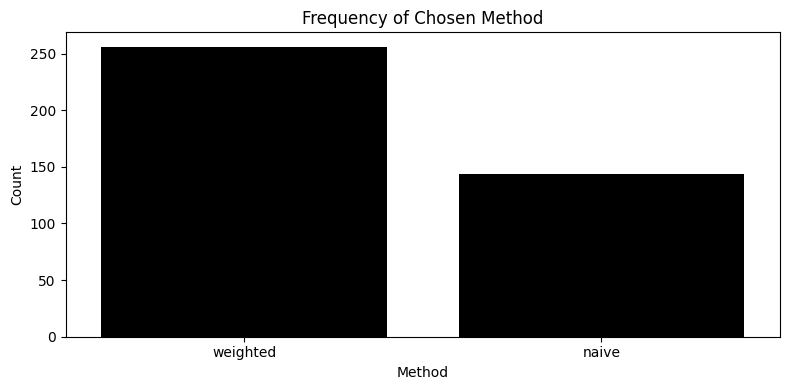

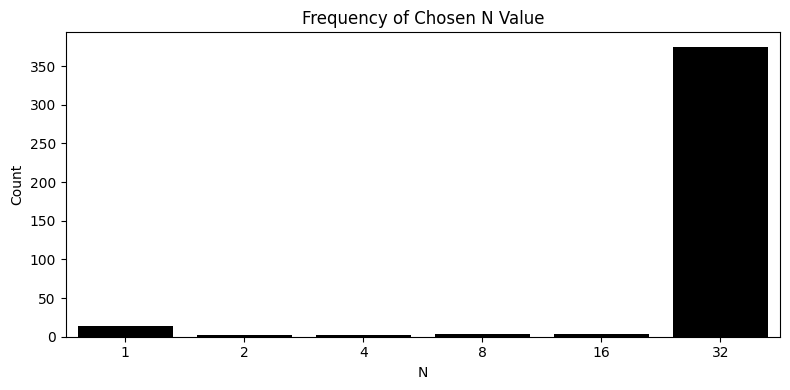

In [170]:
# Plot: Histogram of method counts
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="method", order=adaptive_router_0_lambda["method"].value_counts().index, color="black")
plt.title("Frequency of Chosen Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: Histogram of N values
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="N", order=sorted(adaptive_router_0_lambda["N"].unique()), color="black")
plt.title("Frequency of Chosen N Value")
plt.xlabel("N")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

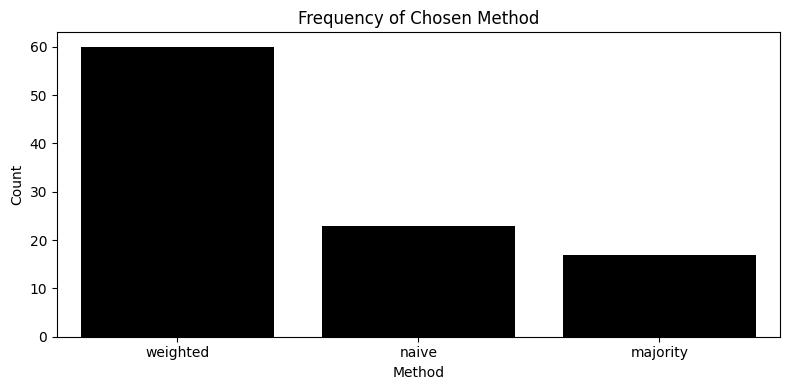

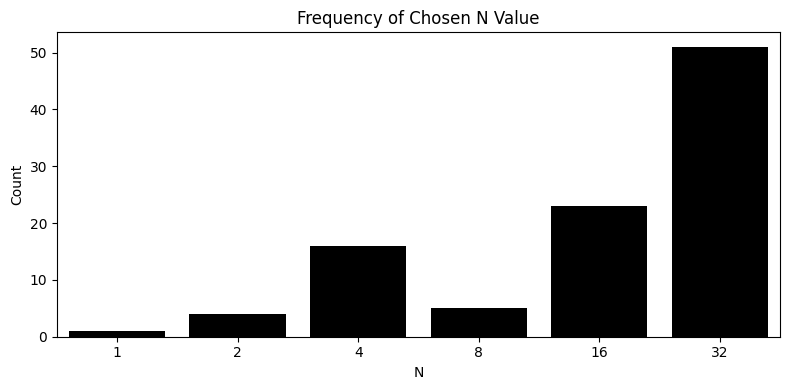

In [178]:
# Plot: Histogram of method counts
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="method", order=adaptive_router_0_lambda["method"].value_counts().index, color="black")
plt.title("Frequency of Chosen Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: Histogram of N values
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="N", order=sorted(adaptive_router_0_lambda["N"].unique()), color="black")
plt.title("Frequency of Chosen N Value")
plt.xlabel("N")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [171]:
# average of indicator column to get the percentage of questions the router answers correctly.
average_accuracy = adaptive_router_0_lambda["indicator"].mean()
average_cost = adaptive_router_0_lambda["max_cost"].mean()
print(f"Average accuracy for lambda={lambda_value} is {average_accuracy:.4f}, average cost is: {average_cost:.4f}")
# print(f"Average cost is: {average_cost:.4f}")

Average accuracy for lambda=0 is 0.6375, average cost is: 15837.1100


In [253]:
# Sweep over lambda values
lambda_list = np.logspace(-50, -1, num=100) 

In [254]:
results = []

for lambda_value in lambda_list:
    adaptive_router = compute_max_utility_pred(df_train, lambda_value)
    # adaptive_router = compute_max_utility_pred(df_train, lambda_value)
    average_accuracy = adaptive_router["indicator"].mean() # accuracy as a percentage of questions (out of all questions in the test set) answered correctly.
    average_cost = adaptive_router["max_cost"].mean()
    average_predicted_prob = adaptive_router["max_predicted_prob"].mean()
    
    results.append({
        "lambda": lambda_value,
        "indicator": average_accuracy,
        "token_count": average_cost,
        "predicted_prob": average_predicted_prob,
    })

# Convert to DataFrame
query_adaptive_df = pd.DataFrame(results)
print(query_adaptive_df)

/tmp/ipykernel_1975045/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1975045/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1975045/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping colum

          lambda  indicator  token_count  predicted_prob
0   1.000000e-50     0.7075   11030.6250        0.695581
1   3.125716e-50     0.7075   11030.6250        0.695581
2   9.770100e-50     0.7075   11030.6250        0.695581
3   3.053856e-49     0.7075   11030.6250        0.695581
4   9.545485e-49     0.7075   11030.6250        0.695581
..           ...        ...          ...             ...
95  1.047616e-03     0.4775     561.7175        0.468966
96  3.274549e-03     0.4000     521.7900        0.403439
97  1.023531e-02     0.3875     519.2925        0.392864
98  3.199267e-02     0.3875     519.2925        0.392864
99  1.000000e-01     0.3875     519.2925        0.392864

[100 rows x 4 columns]


/tmp/ipykernel_1975045/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


In [ ]:
# the routed queries.
query_adaptive_df.head()

,lambda,indicator,token_count,predicted_prob
0,1.000000e-50,0.6575,15914.6125,0.606445
1,3.125716e-50,0.6575,15914.6125,0.606445
2,9.770100e-50,0.6575,15914.6125,0.606445
3,3.053856e-49,0.6575,15914.6125,0.606445
4,9.545485e-49,0.6575,15914.6125,0.606445


,lambda,indicator,token_count,predicted_prob
0,1.000000e-50,0.7075,11030.625,0.695581
1,3.125716e-50,0.7075,11030.625,0.695581
2,9.770100e-50,0.7075,11030.625,0.695581
3,3.053856e-49,0.7075,11030.625,0.695581
4,9.545485e-49,0.7075,11030.625,0.695581


In [236]:
# rename column indicator to accuracy.
config_summary_df

,N,method,indicator,token_count
0,1,majority,0.3875,519.2925
1,1,naive,0.3875,519.2925
2,1,weighted,0.3875,519.2925
3,2,majority,0.3875,1049.5950
4,2,naive,0.4700,1049.5950
5,2,weighted,0.4700,1049.5950
6,4,majority,0.4625,2127.3000
7,4,naive,0.5050,2127.3000
8,4,weighted,0.5125,2127.3000
9,8,majority,0.5350,4169.8125


In [256]:

# outer join on the shared columns ("accuracy", "avg_cot_token_count")
query_optimal_static_df = pd.merge(
    query_adaptive_df,
    config_summary_df,
    on=["indicator", "token_count"],
    how="outer"
)
query_optimal_static_df.head()
# change NaN to -1 for plotting purposes.
query_optimal_static_df = query_optimal_static_df.fillna(-1)

In [257]:
query_optimal_static_df.head(100)


,lambda,indicator,token_count,predicted_prob,N,method
0,1.023531e-02,0.3875,519.2925,0.392864,1.0,majority
1,1.023531e-02,0.3875,519.2925,0.392864,1.0,naive
2,1.023531e-02,0.3875,519.2925,0.392864,1.0,weighted
3,3.199267e-02,0.3875,519.2925,0.392864,1.0,majority
4,3.199267e-02,0.3875,519.2925,0.392864,1.0,naive
...,...,...,...,...,...,...
95,5.857021e-28,0.7075,11030.6250,0.695581,-1.0,-1
96,1.830738e-27,0.7075,11030.6250,0.695581,-1.0,-1
97,5.722368e-27,0.7075,11030.6250,0.695581,-1.0,-1
98,1.788650e-26,0.7075,11030.6250,0.695581,-1.0,-1


['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


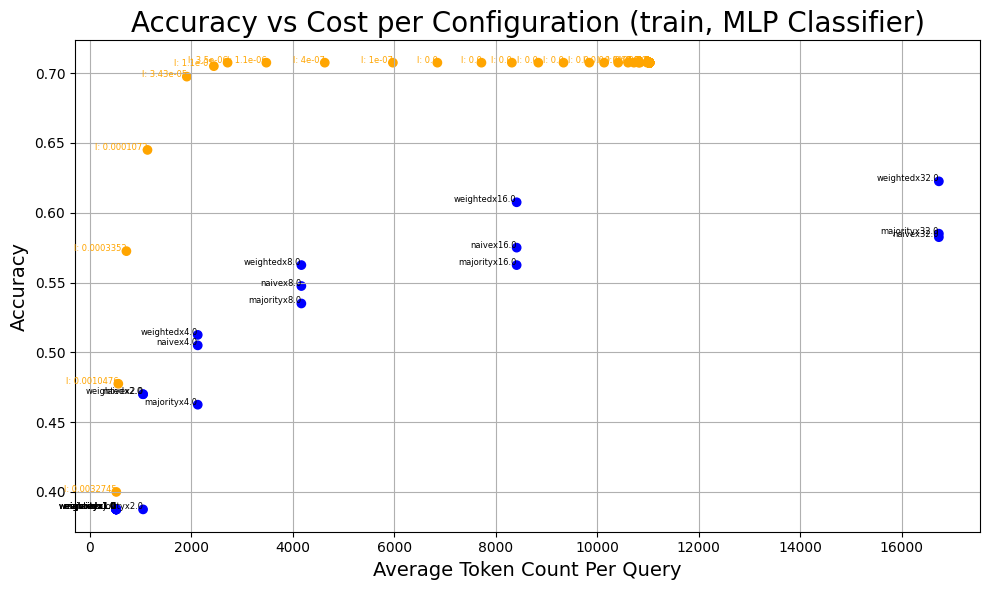

In [258]:
# Create color labels and text labels (sklearn MLPClassifier)
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration (train, MLP Classifier)", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


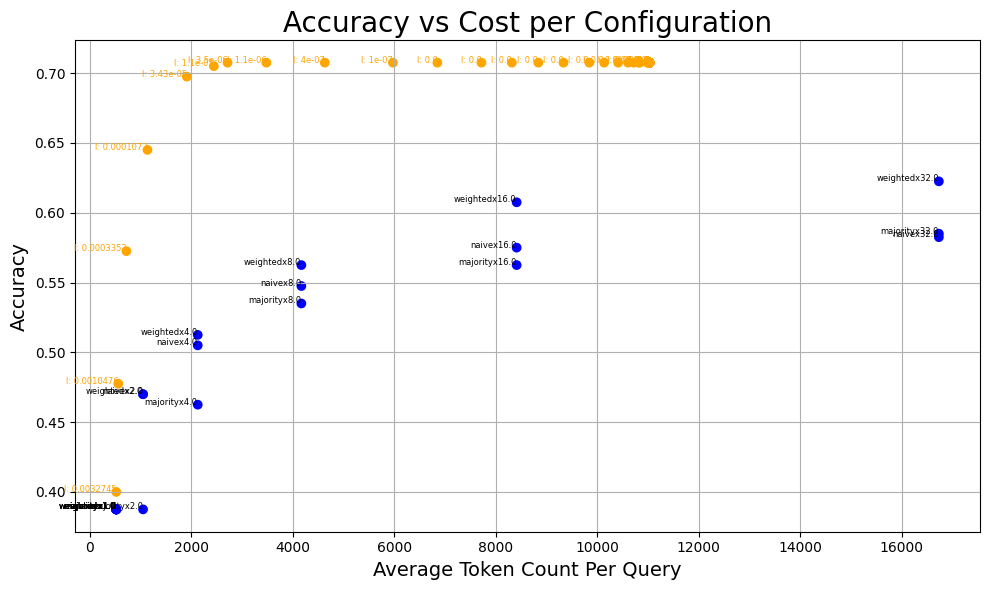

In [242]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig("figs/accuracy_vs_cost_by_config3", dpi=300, bbox_inches='tight')

# notes: make sure we are plotting the accuracy. the probe should pick the weighted response.
# should not go below the blue dots. (check what you are actually plotting).